## Importing Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import dataframe_image as dfi

%matplotlib inline

In [2]:
# Function for saving the figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "AirBnB-London-2020"
IMAGES_PATH = "../reports/figures/"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Importing the Data

In [3]:
df_listings = pd.read_csv('../data/processed/df_listings.csv', low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71825 entries, 0 to 71824
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    71823 non-null  float64
 1   id                                            71824 non-null  object 
 2   listing_url                                   71824 non-null  object 
 3   scrape_id                                     71824 non-null  float64
 4   last_scraped                                  71825 non-null  object 
 5   name                                          71802 non-null  object 
 6   description                                   68996 non-null  object 
 7   neighborhood_overview                         43799 non-null  object 
 8   picture_url                                   71825 non-null  object 
 9   host_id                                       71825 non-null 

In [5]:
df_listings.head(3)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,11551,https://www.airbnb.com/rooms/11551,2.020122e+13,2021-01-04,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039.0,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,1.0,0.90,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4.0,NaN,1.0,1.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",105.0,2,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3.0,33.0,63.0,338.0,2021-01-04,192.0,6.0,0.0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,2.0,2.0,0.0,0.0,1.46
1,1.0,13913,https://www.airbnb.com/rooms/13913,2.020122e+13,2020-12-18,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730.0,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,1.0,0.75,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2.0,NaN,1.0,1.0,0.0,"[""Long term stays allowed"", ""Lock on bedroom d...",40.0,1,29.0,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30.0,60.0,90.0,365.0,2020-12-18,21.0,1.0,0.0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2.0,1.0,1.0,0.0,0.17
2,2.0,15400,https://www.airbnb.com/rooms/15400,2.020122e+13,2020-12-28,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",NaN,NaN,1.00,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2.0,NaN,1.0,1.0,1.0,"[""Refrigerator"", ""Wifi"", ""Heating"", ""

## Business Questions

- What is the spread of prices using the map of London map? Prices by all year availability?

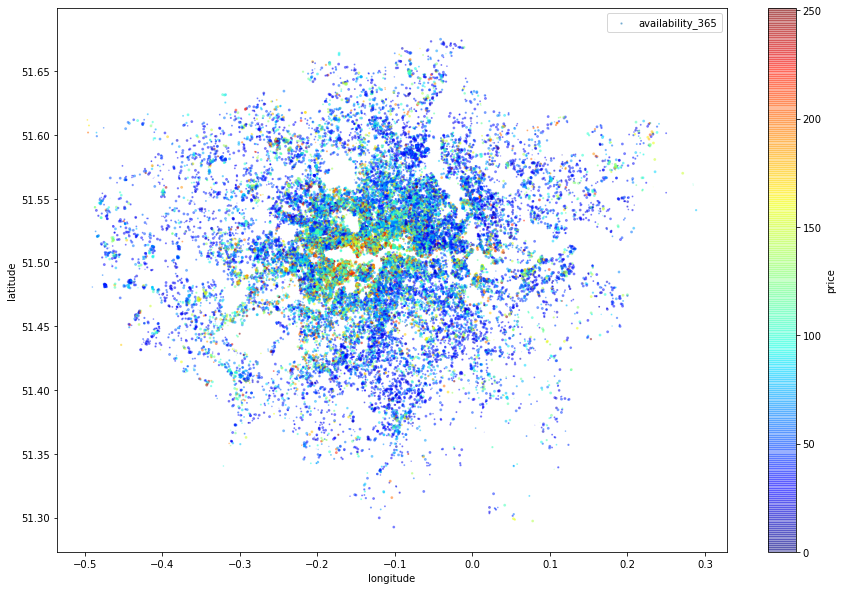

In [6]:
# Initial map of London prices by all year availability
df_listings.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(15,10),
                 s=(df_listings["availability_365"])/100, label="availability_365", 
                 c="price", cmap=plt.get_cmap('jet'), 
                 colorbar=True,
                 sharex=False)
plt.show()

Saving figure availability_365_prices_scatterplot


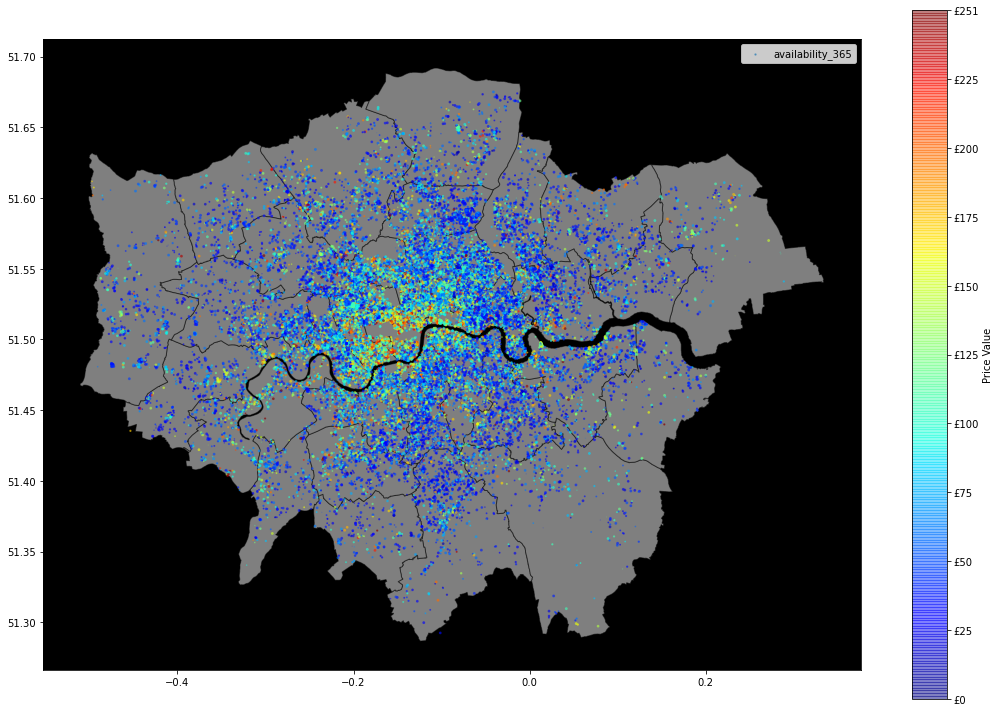

In [7]:
# Completed map of London prices by all year availability
fig, ax = plt.subplots(1, 1, figsize=(15,10))

basemap = gpd.read_file('../data/external/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
basemap = basemap.to_crs(epsg=4326)


basemap = basemap.plot(alpha=0.5, edgecolor='k',color='White',figsize=(15,10),ax=ax)
basemap.set_facecolor('black')


x, y = df_listings['longitude'].values, df_listings['latitude'].values
basemap.scatter(x,y, alpha=0.5,
                 s=(df_listings["availability_365"])/100, label="availability_365", 
                 c=df_listings["price"], cmap=plt.get_cmap('jet'))


sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'))
prices = df_listings["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = fig.colorbar(sm, ticks=tick_values/prices.max(), alpha=0.5)
cbar.ax.set_yticklabels(["£%d"% v for v in tick_values], fontsize=10)
cbar.set_label('Price Value', fontsize=10)

# Removing ticks
#plt.xticks([]),
#plt.yticks([])

plt.legend(fontsize=10)
save_fig("availability_365_prices_scatterplot")
plt.show()

- What is the average price of the listings, for the different location within London?

In [8]:
price_df = df_listings[df_listings['price'].isnull() == False]

In [9]:
price_df['neighbourhood_cleansed'].value_counts()[:5]

Westminster               7218
Tower Hamlets             6659
Hackney                   5592
Camden                    4836
Kensington and Chelsea    4359
Name: neighbourhood_cleansed, dtype: int64

In [10]:
nb_price_avg = price_df.groupby('neighbourhood_cleansed', as_index=False).mean()
nb_price_avg = pd.DataFrame(nb_price_avg).sort_values(by='price', ascending=False)

In [11]:
nb_price_avg = nb_price_avg.rename(columns={'neighbourhood_cleansed':'Neighbourhood','price': 'Avg Price'})

In [12]:
def chart_plot(data, x_label, y_label):
    
    plt.figure(figsize=(10,5))

    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_label, y=y_label, data=data)

    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=60, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium', 
        rotation_mode='anchor'
    )

Saving figure Neighbourhood_av_price_histogram_plots


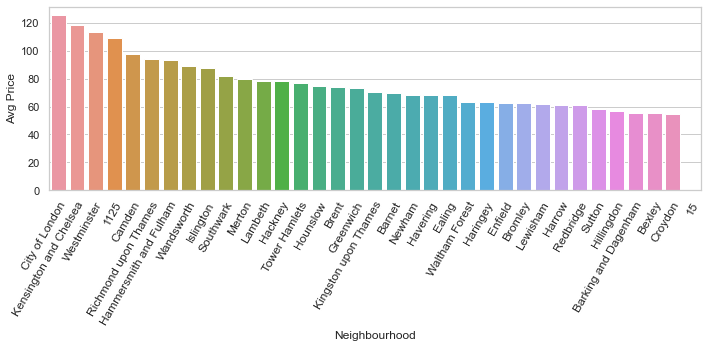

In [13]:
chart_plot(nb_price_avg,"Neighbourhood", "Avg Price")
save_fig("Neighbourhood_av_price_histogram_plots")

- What types of verifications are hosts using? How long did it take them to respond?

In [14]:
verifications_df = df_listings[df_listings['host_verifications'].isnull() == False]

In [15]:
verifications_df = verifications_df[verifications_df['host_verifications'] != '[]']

In [16]:
def verifications_types(column):
    verifications_dict = {}
    temp = []

    for i in column:
        temp.append(eval(i))
    
    for i in temp:
        try:
            for j in i:
                if j not in verifications_dict:
                    verifications_dict[j] = 1
                else:
                    verifications_dict[j] += 1
        except:
            continue
            
    return verifications_dict
        
verifications_types = verifications_types(verifications_df['host_verifications'])

In [17]:
for k,v in verifications_types.items():
    verifications_types[k] = round(v / verifications_df.shape[0] * 100, 3)

In [18]:
verifications_types = pd.DataFrame.from_dict(verifications_types,orient='index',columns=['A']).reset_index()
verifications_types = verifications_types.rename(columns={'index':'Verification Type','A': '% of listings'})
top10_verifications_types = verifications_types.sort_values(by='% of listings', ascending=False)[:10]

Saving figure Verification_type_price_histogram_plots


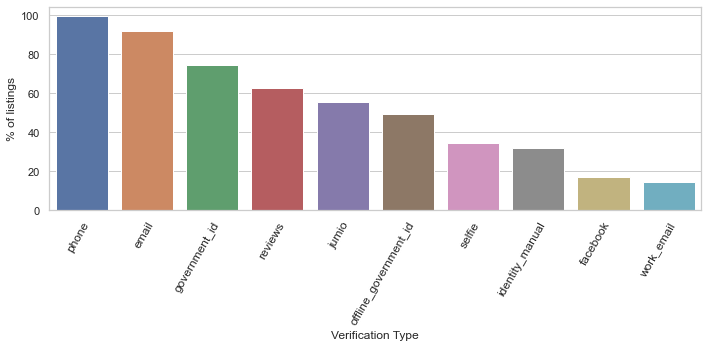

In [19]:
chart_plot(top10_verifications_types,"Verification Type", "% of listings")
save_fig("Verification_type_price_histogram_plots")

- What amenities are most used and does the amenity affect the review? 

In [20]:
df_left = df_listings[['id','amenities']]

In [21]:
df_left = df_left[df_left['amenities'].notnull()]

In [22]:
df_right = df_listings[['id','review_scores_value']]

In [23]:
from ast import literal_eval

df_left['amenities'] = df_left['amenities'].apply(literal_eval)
df_left = df_left.explode('amenities')

In [24]:
df_left.head()

,id,amenities
0,11551,Refrigerator
0,11551,Kitchen
0,11551,Crib
0,11551,Dedicated workspace
0,11551,Lockbox


In [25]:
result = pd.merge(df_left, df_right, on='id')

In [26]:
result = result.groupby('amenities').agg({'review_scores_value': ['count', 'min', 'max', 'mean']})

In [27]:
result = result.reset_index()

In [28]:
result.head().columns

MultiIndex([(          'amenities',      ''),
            ('review_scores_value', 'count'),
            ('review_scores_value',   'min'),
            ('review_scores_value',   'max'),
            ('review_scores_value',  'mean')],
           )

In [29]:
result = result.sort_values(by=[('review_scores_value', 'mean'),
                                ('review_scores_value',  'min'),
                                ('review_scores_value',  'max')], ascending=False)

In [30]:
result.columns = ["_".join(x) for x in result.columns.ravel()]

<ipython-input-30-635f38300952>:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  result.columns = ["_".join(x) for x in result.columns.ravel()]


In [31]:
result.head().columns

Index(['amenities_', 'review_scores_value_count', 'review_scores_value_min',
       'review_scores_value_max', 'review_scores_value_mean'],
      dtype='object')

In [32]:
result.rename(columns={"amenities_":"Amenities", 
                       "review_scores_value_count":"Count Listings",
                       "review_scores_value_min":"Review Min Value",
                       "review_scores_value_max":"Review Max Value",
                       "review_scores_value_mean":"Review Avg Value"}, inplace=True)

In [33]:
result.head()

,Amenities,Count Listings,Review Min Value,Review Max Value,Review Avg Value
4,"14"" TV with Netflix, standard cable",1,10.0,10.0,10.0
6,"19"" HDTV with Netflix, premium cable, Roku",1,10.0,10.0,10.0
7,"20"" HDTV with standard cable",1,10.0,10.0,10.0
11,"28"" HDTV with Netflix, standard cable",1,10.0,10.0,10.0
12,"30"" TV",2,10.0,10.0,10.0


In [34]:
result = result[result['Count Listings'] > 10]

In [35]:
result = result.head(20).style.background_gradient() \
               .format({"Amenities": lambda x:x.lower()}) \
               .format({"Review Min Value": "{:20,.2f}"}) \
               .format({"Review Max Value": "{:20,.2f}"}) \
               .format({"Review Avg Value": "{:20,.2f}"}) \
               .hide_index()\
               .background_gradient(cmap='Blues')

In [36]:
result.set_properties(subset=["Amenities", 
                              "Count Listings", 
                              "Review Min Value", 
                              "Review Max Value", 
                              "Review Avg Value"], **{'text-align': 'left'}) \
      .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Amenities,Count Listings,Review Min Value,Review Max Value,Review Avg Value
stainless steel gas stove,21,8.00,10.00,9.81
cleaning products,29,9.00,10.00,9.79
pets allowed,28,9.00,10.00,9.75
clothing storage,11,9.00,10.00,9.73
record player,46,6.00,10.00,9.72
self check-in,158,8.00,10.00,9.71
electric stove,52,8.00,10.00,9.69
bathroom essentials,279,8.00,10.00,9.68
bedroom comforts,279,8.00,10.00,9.68
full kitchen,210,8.00,10.00,9.66


In [37]:
dfi.export(result, '../reports/figures/top_amenities.png')